In [1]:
import logging

import anndata
import numpy as np
import pandas as pd
import plotnine as p
import matplotlib.pyplot as plt
import scvi
from scvi.model.utils import mde
import scHPL
import torch
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

Global seed set to 0


In [2]:
alladata = anndata.read('GSE214695.h5ad')

In [3]:
alladata

AnnData object with n_obs × n_vars = 60952 × 33538
    obs: 'sample_name', 'total_counts'
    var: 'gene_id', 'feature_type'

In [4]:
adata = alladata[alladata.obs.sample(10_000).index].copy()

In [5]:
adata

AnnData object with n_obs × n_vars = 10000 × 33538
    obs: 'sample_name', 'total_counts'
    var: 'gene_id', 'feature_type'

In [6]:
scvi.model.SCVI.setup_anndata(
    adata,
    batch_key = 'sample_name',
    size_factor_key = 'total_counts'
)

model = scvi.model.SCVI(
    adata,
    gene_likelihood = 'nb'
)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [7]:
frac_stats = []
for epoch in range(1, 40 + 1):
    print(epoch)
    
    model.train(1, check_val_every_n_epoch = 1, enable_progress_bar = False)
    
    scdl_ = model._make_data_loader(adata, batch_size = 16)

    n_within = 0
    total = 0
    for tensors in tqdm(scdl_):
        inference = model.module.inference(**model.module._get_inference_input(tensors))
        qz = inference['qz']
        inference['z'] = qz.sample_n(200).detach()

        generative = model.module.generative(**model.module._get_generative_input(tensors, inference))
        px = generative['px']
        px_sample = px.sample().detach()

        xt = tensors['X'].cuda().detach()

        above = (px_sample.quantile(0.05, 0) <= xt).detach()
        below = (xt <= px_sample.quantile(0.95, 0)).detach()
        n_within += (above & below).sum()

        total += xt.shape[0] * xt.shape[1]

    frac_within = n_within.cpu().numpy() / total
    frac_stats += [{'epoch': epoch, 'frac_within': frac_within}]

1


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:57<00:00,  3.52it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [03:04<00:00,  3.39it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


3


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:50<00:00,  3.67it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


4


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:47<00:00,  3.72it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


5


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:46<00:00,  3.75it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


6


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:46<00:00,  3.76it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


7


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:45<00:00,  3.77it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


8


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:45<00:00,  3.77it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


9


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:46<00:00,  3.76it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


10


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:46<00:00,  3.76it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


11


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:46<00:00,  3.76it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


12


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:46<00:00,  3.76it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


13


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:46<00:00,  3.76it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


14


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:45<00:00,  3.78it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


15


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:45<00:00,  3.77it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


16


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:45<00:00,  3.78it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


17


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:45<00:00,  3.78it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


18


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:45<00:00,  3.77it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


19


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:45<00:00,  3.79it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


20


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:44<00:00,  3.79it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


21


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:45<00:00,  3.78it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


22


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:44<00:00,  3.79it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


23


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:45<00:00,  3.78it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


24


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:45<00:00,  3.79it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


25


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:44<00:00,  3.79it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


26


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [02:56<00:00,  3.54it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


27


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [03:05<00:00,  3.37it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


28


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [03:05<00:00,  3.36it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


29


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [03:05<00:00,  3.37it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


30


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [03:05<00:00,  3.36it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


31


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [03:06<00:00,  3.35it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


32


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [03:06<00:00,  3.35it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


33


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [03:06<00:00,  3.34it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


34


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [03:06<00:00,  3.36it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


35


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [03:06<00:00,  3.35it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


36


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [03:06<00:00,  3.35it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


37


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [03:06<00:00,  3.35it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


38


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [03:06<00:00,  3.34it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


39


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [03:05<00:00,  3.36it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


40


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=1` reached.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [03:06<00:00,  3.36it/s]


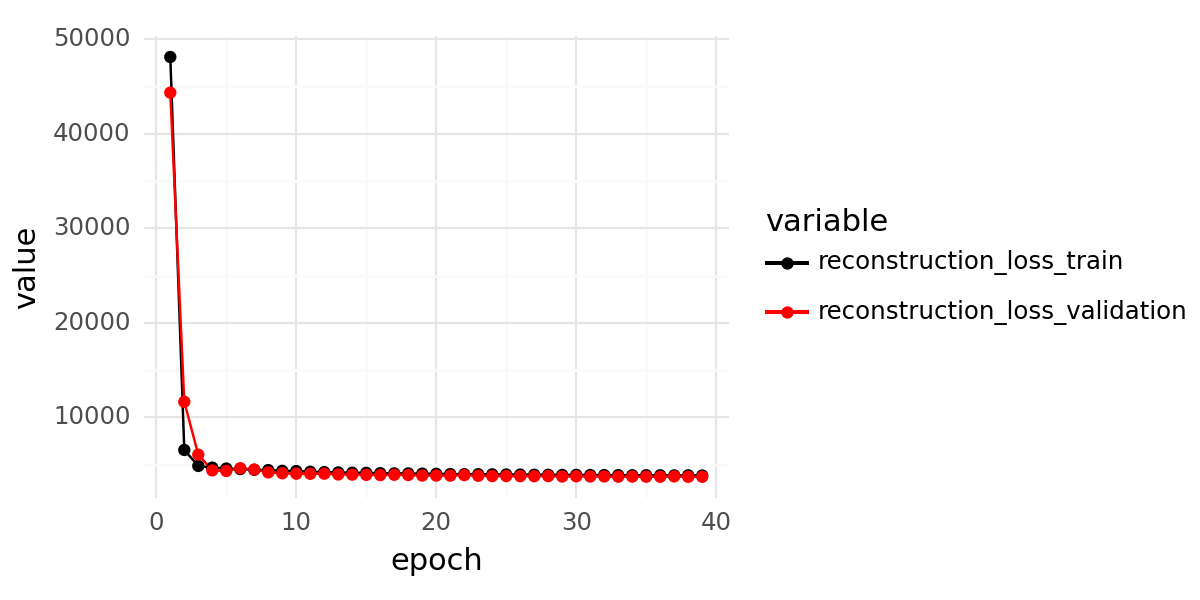

In [8]:
history_df = (
    model.history['reconstruction_loss_train'].astype(float)
    .join(model.history['reconstruction_loss_validation'].astype(float))
    .reset_index()
    .melt(id_vars = ['epoch'])
)

p.options.figure_size = 6, 3

p_ = (
    p.ggplot(p.aes(x = 'epoch', y = 'value', color = 'variable'), history_df.query('epoch > 0'))
    + p.geom_line()
    + p.geom_point()
    + p.scale_color_manual({'reconstruction_loss_train': 'black', 'reconstruction_loss_validation': 'red'})
    + p.theme_minimal()
)

# p_.save('fig1.png', dpi = 300)

print(p_)

In [11]:
frac_stats_df = pd.DataFrame(frac_stats)

In [12]:
frac_stats_df

,epoch,frac_within
0,1,0.888780
1,2,0.926164
2,3,0.982995
3,4,0.989259
4,5,0.991686
5,6,0.991206
6,7,0.987883
7,8,0.987592
8,9,0.992750
9,10,0.992598


In [13]:
history_df

,epoch,variable,value
0,0,reconstruction_loss_train,271085.031250
1,1,reconstruction_loss_train,48112.417969
2,2,reconstruction_loss_train,6560.387207
3,3,reconstruction_loss_train,4872.390137
4,4,reconstruction_loss_train,4697.051270
...,...,...,...
75,35,reconstruction_loss_validation,3731.261963
76,36,reconstruction_loss_validation,3729.708984
77,37,reconstruction_loss_validation,3769.084473
78,38,reconstruction_loss_validation,3722.366211


In [14]:
frac_stats_df.to_csv('frac_stats.csv')

In [15]:
history_df.to_csv('history_df.csv')